# Neural Gas

In [1]:
#Importación de variables
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
#PASO 1. CARGAR BASE DE DATOS Y RUTAS
BaseAumentada = pd.read_csv("C:/Users/clau_/OneDrive/Documentos/FCFM/03_Tetramestre/Aprendizaje_Profundo/Clase 04/BaseLD.csv")
BaseAumentada

SegmentR  PEPR  AgeR  TimeRelationR  IncomeSourceR  ActivityR  \
0            80   100    96            100            100         97   
1            96    96    97             98             99         96   
2            81    98    99             99             99         98   
3            96    99    99            100             96         99   
4            82    99    98             98             97        100   
...         ...   ...   ...            ...            ...        ...   
27746        19    12    32             19             27         19   
27747        20     9    32             18             25         19   
27748        22    10    34             21             26         19   
27749        20    12    33             20             24         22   
27750        20    11    34             21             26         19   

       NationalityR  CommonAddR  ProductTR  SubproductR  ...  SumReR  RSR  \
0                96          72         98           77  ...      64   66   
1                96          69         97           77  ...      83   84   
2                97          68         96           98  ...      84   64   
3                99          68         98           99  ...      84   84   
4                97          68        100           96  ...      66   84   
...             ...         ...        ...          ...  ...     ...  ...   
27746            11          11         26            8  ...      25   23   
27747            10          10         27           12  ...      26   27   
27748             8          10         26            3  ...      24    5   
27749             9          11         23            6  ...      24   27   
27750             9           8         27           11  ...       3   27   

       AAR  SendingNumR  ReceivingNumR  StateOpeR  StateResR  MunOpeR  \
0       72           80             78         91         79       97   
1       71           81             78         92         81       99   
2       89           82             82         90         82       99   
3       88           81             80         91         82       96   
4       68           80             82         89         82       97   
...    ...          ...            ...        ...        ...      ...   
27746   29            4              6         19         19       17   
27747   12           21             20         18         22       16   
27748   28           18              6         29         20       15   
27749   12           20             18         28          9       14   
27750    8            5             21         22         18       16   

       MunResR  CountryR  
0           89        99  
1           90       100  
2           92        96  
3           89        96  
4           89        97  
...        ...       ...  
27746        4        10  
27747        5         9  
27748        7         8  
27749        5        12  
27750        7         8  

[27751 rows x 30 columns]

In [3]:
# Inicializamos los centroides
centroides = []
aux = BaseAumentada.apply(lambda x: float(x.min()))
centroides.append(aux)
aux = BaseAumentada.apply(lambda x: float(x.mean()))
centroides.append(aux)
aux = BaseAumentada.apply(lambda x: float(x.max()))
centroides.append(aux)
centroides_df = pd.concat(centroides, axis=1)

In [4]:
#Funciones
def funcion_t(inicial, final, iteracion, max_iteracion):
    if inicial == 0 or max_iteracion == 0:
        return 0
    else:
        return inicial * ((final / inicial) ** (iteracion / max_iteracion))
    
def h_r(r, p_t):
    return np.exp(-(r / p_t))

In [5]:
def graficar_centroides(data, pertenecia, centroides, iteracion):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroides_2d = pca.transform(centroides.T)
    clear_output(wait=True)
    plt.title(f'Iteración {iteracion}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=pertenecia)
    plt.scatter(x=centroides_2d[:,0], y=centroides_2d[:,1])
    plt.show()

In [6]:
#Hiperparámetros
rho_0 = 1.0
rho_f = 0.1
eta_0 = 0.1
eta_f = 0.01
iteraciones = 5
m, n = BaseAumentada.shape

In [7]:
# Seleccionar un punto aleatorio del conjunto de datos
base = BaseAumentada.copy()
BaseAumentada["Pertenencia"] = -1
for iteracion in range(iteraciones):
    for i in range(m):
        punto = BaseAumentada.iloc[i, :]

        # Calcular distancias entre el punto y los centroides
        distancias = centroides_df.apply(lambda x: np.sqrt(((punto.to_frame().T - x)**2).sum(axis=1)))
        BaseAumentada.at[i, "Pertenencia"] = distancias.idxmin(axis=1)

        # Actualizar parámetros de acuerdo con las fórmulas proporcionadas
        rho_t = funcion_t(rho_0, rho_f, iteracion, iteraciones)
        eta_t = funcion_t(eta_0, eta_f, iteracion, iteraciones)

        Rs = distancias.rank(axis = 1, method = 'min')

        # Calcular la función de vecindario utilizando los nuevos parámetros
        influencia = h_r(Rs, rho_t)

        # Actualizar posiciones de los centroides        
        for k in range(0, 3):
            cluster = eta_t * influencia[k]*(punto.to_frame().T - centroides_df[k]).T
            centroides_df[k] = centroides_df[k] + cluster.iloc[:, 0]

        print(f'Iteracion {iteracion} Dato {i} completado')
centroides_df.to_csv('clusters.csv', index=False)
BaseAumentada.to_csv('BaseAumentada.csv', index = False)

Iteracion 0 Dato 0 completado
Iteracion 0 Dato 1 completado
Iteracion 0 Dato 2 completado
Iteracion 0 Dato 3 completado
Iteracion 0 Dato 4 completado
Iteracion 0 Dato 5 completado
Iteracion 0 Dato 6 completado
Iteracion 0 Dato 7 completado
Iteracion 0 Dato 8 completado
Iteracion 0 Dato 9 completado
Iteracion 0 Dato 10 completado
Iteracion 0 Dato 11 completado
Iteracion 0 Dato 12 completado
Iteracion 0 Dato 13 completado
Iteracion 0 Dato 14 completado
Iteracion 0 Dato 15 completado
Iteracion 0 Dato 16 completado
Iteracion 0 Dato 17 completado
Iteracion 0 Dato 18 completado
Iteracion 0 Dato 19 completado
Iteracion 0 Dato 20 completado
Iteracion 0 Dato 21 completado
Iteracion 0 Dato 22 completado
Iteracion 0 Dato 23 completado
Iteracion 0 Dato 24 completado
Iteracion 0 Dato 25 completado
Iteracion 0 Dato 26 completado
Iteracion 0 Dato 27 completado
Iteracion 0 Dato 28 completado
Iteracion 0 Dato 29 completado
Iteracion 0 Dato 30 completado
Iteracion 0 Dato 31 completado
Iteracion 0 Dato 3

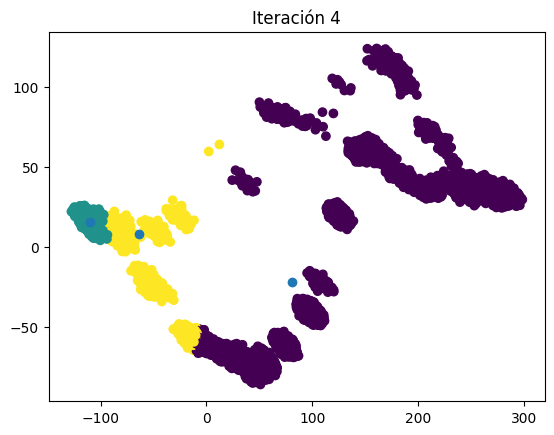

In [12]:
graficar_centroides(BaseAumentada.drop("Pertenencia", axis=1), BaseAumentada["Pertenencia"], centroides_df, iteracion)

In [13]:
centroides_df

0          1          2
SegmentR       59.933788  20.089673  43.853840
PEPR           36.536243  10.013726  14.012500
AgeR           62.397849  33.046647  40.223077
TimeRelationR  56.143093  20.031650  29.425605
IncomeSourceR  49.535953  25.042734  34.196057
ActivityR      58.016250  20.050680  28.541945
NationalityR   42.524903  10.003227  14.374933
CommonAddR     37.631633  10.006249  12.416788
ProductTR      39.216297  24.981662  26.713393
SubproductR    49.177848   7.533669  20.078331
OperationTR    38.868970   4.303369  16.341222
MonetaryInstR  65.057647  20.030828  34.167787
DivisaR        57.531036  20.041852  28.029947
ChannelR       58.104927  20.036815  38.201472
OperabilitySR  65.305184  10.247227  26.832529
OGoverR        26.222445  10.032501  12.462669
SARR           33.720201  15.032149  16.999674
VMR            50.752443  29.975202  31.955548
VOR            60.281884  29.980125  38.591590
SumSeR         38.159249  15.171842  17.094407
SumReR         40.994806  14.734593  16.895101
RSR            47.006824  15.090381  31.333690
AAR            50.910846  19.953322  34.759781
SendingNumR    48.832343  12.430311  30.502756
ReceivingNumR  48.527126  12.570439  18.496527
StateOpeR      47.879543  25.016286  26.820933
StateResR      56.116971  15.078486  22.931335
MunOpeR        77.123553  15.010438  19.738203
MunResR        78.017690   4.998045  19.292453
CountryR       35.127278   9.994105  13.960164

In [14]:
# Print means
suma_promedio = np.sum(centroides_df, axis=0) / 30
suma_promedio_df = pd.DataFrame({"Neurona": ["Neurona1", "Neurona2", "Neurona3"], "Suma.Promedio": suma_promedio})
suma_promedio_df

Neurona  Suma.Promedio
0  Neurona1      50.521827
1  Neurona2      16.684274
2  Neurona3      25.308142

In [15]:
BaseAumentada["Pertenencia"].value_counts()

Pertenencia
1    13038
0    12668
2     2045
Name: count, dtype: int64

In [16]:
#Calculando el índice H
centroide_global = np.mean(BaseAumentada.drop("Pertenencia", axis=1))

#Numerador: sumatoria del cuadrado de las distancias euclidiana entre los centroides y el centro global de los puntos
SumCentroidesvsGlobal = np.sum(np.linalg.norm(centroides_df.to_numpy() - centroide_global, axis = 1) ** 2)

#Denominador: sumatoria de la sumatoria por cluster del cuadrado de la distancia entre los puntos con su respectivo cluster
SumCentroidesvsPuntos = 0
for cluster, centroide in enumerate(centroides_df):
    puntos_centroide = BaseAumentada[BaseAumentada["Pertenencia"] == cluster].drop("Pertenencia", axis=1)
    SumCentroidesvsPuntos += np.sum(np.linalg.norm(np.mean(centroides_df[cluster].to_numpy()) - puntos_centroide, axis=1) ** 2)

K = 3 #Número de centroides
m = BaseAumentada.shape[0]
#Hacemos la operación
IndiceH = (SumCentroidesvsGlobal / (K - 1)) / (SumCentroidesvsPuntos / (m - K))
IndiceH


1.2684609078826596